In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
pd.set_option('display.max_columns', None)
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Yes No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No No
4,9237-HQITU,NaN,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7043 non-null   object 
 1   gender                         6943 non-null   object 
 2   SeniorCitizen                  7043 non-null   int64  
 3   Partner                        6943 non-null   object 
 4   Dependents                     7043 non-null   object 
 5   tenure                         7043 non-null   int64  
 6   PhoneService                   7043 non-null   object 
 7   MultipleLines                  7043 non-null   object 
 8   InternetService                7043 non-null   object 
 9   OnlineSecurity                 7043 non-null   object 
 10  OnlineBackup                   7043 non-null   object 
 11  DeviceProtection               7043 non-null   object 
 12  TechSupport                    7043 non-null   o

In [ ]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df.dtypes

customerID                        object
gender                            object
SeniorCitizen                      int64
Partner                           object
Dependents                        object
tenure                             int64
PhoneService                      object
MultipleLines                     object
InternetService                   object
OnlineSecurity                    object
OnlineBackup                      object
DeviceProtection                  object
TechSupport                       object
StreamingTV                       object
StreamingMovies                   object
Contract                          object
PaperlessBilling                  object
PaymentMethod                     object
MonthlyCharges                   float64
TotalCharges                      object
Churn                             object
PhoneService,PaperlessBilling     object
dtype: object

In [ ]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.TotalCharges.isnull().sum()

11

In [ ]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,No Yes
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,Yes No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,Yes No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,Yes No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,No No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,Yes No
3826,3213-VVOLG,Male,0,NaN,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,Yes No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,Yes No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,Yes Yes
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,Yes No


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
# Tenure is equal to 0 and that's why it is empty in dataset.When we convert Tenure column to numeric dtype zeros will be Nan values.There for we fill NaN values with zeros (total charges = tenure*montly charges)

In [ ]:
df.isnull().sum()

customerID                         0
gender                           100
SeniorCitizen                      0
Partner                          100
Dependents                         0
tenure                             0
PhoneService                       0
MultipleLines                      0
InternetService                    0
OnlineSecurity                     0
OnlineBackup                       0
DeviceProtection                   0
TechSupport                        0
StreamingTV                        0
StreamingMovies                    0
Contract                           0
PaperlessBilling                   0
PaymentMethod                      0
MonthlyCharges                     0
TotalCharges                       0
Churn                              0
PhoneService,PaperlessBilling      0
dtype: int64

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [ ]:
df = df.replace('No internet service', 'No')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

customerID                       0
gender                           0
SeniorCitizen                    0
Partner                          0
Dependents                       0
tenure                           0
PhoneService                     0
MultipleLines                    0
InternetService                  0
OnlineSecurity                   0
OnlineBackup                     0
DeviceProtection                 0
TechSupport                      0
StreamingTV                      0
StreamingMovies                  0
Contract                         0
PaperlessBilling                 0
PaymentMethod                    0
MonthlyCharges                   0
TotalCharges                     0
Churn                            0
PhoneService,PaperlessBilling    0
dtype: int64

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'phoneservice,paperlessbilling'],
      dtype='object')

In [ ]:
del df['customerid']
del df['phoneservice,paperlessbilling']

In [ ]:
print(df.groupby('churn').monthlycharges.describe().round(0))

        count  mean   std   min   25%   50%   75%    max
churn                                                   
No     5033.0  61.0  31.0  18.0  25.0  65.0  89.0  119.0
Yes    1813.0  74.0  25.0  19.0  56.0  80.0  94.0  118.0


In [ ]:
# Copy the DataFrame
df_transformed = df.copy()

# Define the columns to transform
columns1 = ['gender', 'partner', 'dependents', 'paperlessbilling', 'churn', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# Transform the specified columns
for i in columns1:
    if i == 'gender':
        df_transformed[i] = df_transformed[i].map({'Female': 0, 'Male': 1})
    else:
        df_transformed[i] = df_transformed[i].map({'Yes': 1, 'No': 0})

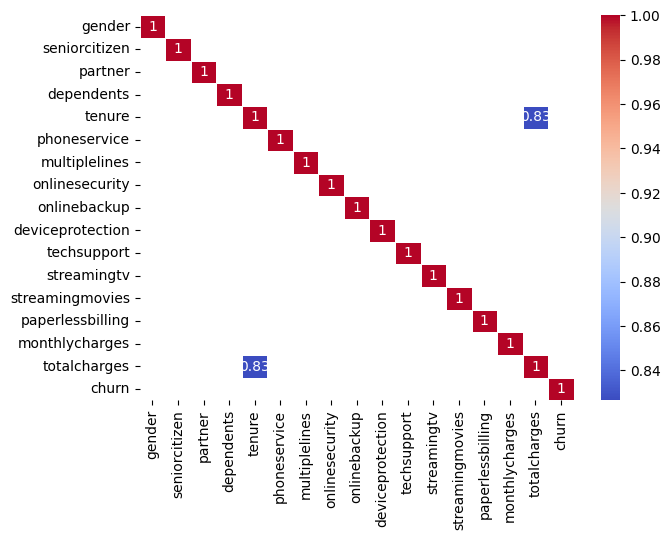

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_transformed.corr(numeric_only=True)

# Filter correlations greater than 0.7 (absolute value)
high_corr = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]

# Display the filtered correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

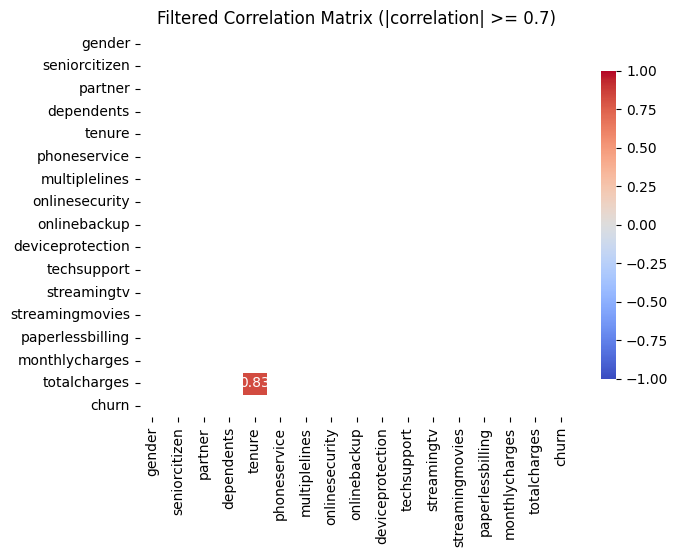

In [ ]:
# Filter correlations
threshold = 0.7
filtered_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(filtered_corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Filtered Correlation Matrix (|correlation| >= 0.7)')
plt.show()


In [ ]:
columns2 = ['internetservice', 'contract','paymentmethod']

In [ ]:
df_transformed = pd.get_dummies(df_transformed, columns = columns2, dtype=int, drop_first=True)

In [ ]:
'''

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Filter correlations greater than 0.7 (absolute value)
high_corr = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]

high_corr = high_corr.fillna(0)  # Replace non-finite values with 0

# Display the filtered correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
'''

"\n\n# Calculate the correlation matrix\ncorr_matrix = df1.corr()\n\n# Filter correlations greater than 0.7 (absolute value)\nhigh_corr = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]\n\nhigh_corr = high_corr.fillna(0)  # Replace non-finite values with 0\n\n# Display the filtered correlation matrix\nplt.figure(figsize=(14, 10))\nsns.heatmap(high_corr, annot=True, cmap='coolwarm', linewidths=0.5)\nplt.show()\n"

In [ ]:
'''
# Filter correlations
threshold = 0.7
filtered_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(filtered_corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Filtered Correlation Matrix (|correlation| >= 0.7)')
plt.show()
'''

'\n# Filter correlations\nthreshold = 0.7\nfiltered_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]\n\n# Generate a mask for the upper triangle\nmask = np.triu(np.ones_like(filtered_corr, dtype=bool))\n\n# Set up the matplotlib figure\nplt.figure(figsize=(14, 10))\n\n# Draw the heatmap with the mask and correct aspect ratio\nsns.heatmap(filtered_corr, mask=mask, annot=True, fmt=".2f", cmap=\'coolwarm\', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": .8})\nplt.title(\'Filtered Correlation Matrix (|correlation| >= 0.7)\')\nplt.show()\n'

In [ ]:
df_transformed.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
5,0,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,1,0,0,0,0,1,0


In [ ]:
# Standardize the features
scaler_standard = StandardScaler()
df_transformed['monthlycharges'] = scaler_standard.fit_transform(df[['monthlycharges']])
df_transformed['totalcharges'] = scaler_standard.fit_transform(df[['totalcharges']])
df_transformed['tenure'] = scaler_standard.fit_transform(df[['tenure']])
df_transformed.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,-1.275234,0,0,0,1,0,0,0,0,1,-1.164170,-0.993153,0,0,0,0,0,0,1,0
1,1,0,0,0,0.068615,1,0,1,0,1,0,0,0,0,-0.262348,-0.171321,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.234512,1,0,1,1,0,0,0,0,1,-0.365508,-0.958550,1,0,0,0,0,0,0,1
3,1,0,0,0,0.516564,0,0,1,0,1,1,0,0,0,-0.749864,-0.192865,0,0,0,1,0,0,0,0
5,0,0,0,0,-0.990175,1,1,0,0,1,0,1,1,1,1.158604,-0.643743,1,1,0,0,0,0,1,0


In [ ]:
# Splitting the data
X = df_transformed.drop('churn', axis=1)
y = df_transformed['churn']

In [ ]:
X.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,internetservice_Fiber optic,internetservice_No,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,-1.275234,0,0,0,1,0,0,0,0,1,-1.164170,-0.993153,0,0,0,0,0,1,0
1,1,0,0,0,0.068615,1,0,1,0,1,0,0,0,0,-0.262348,-0.171321,0,0,1,0,0,0,1
2,1,0,0,0,-1.234512,1,0,1,1,0,0,0,0,1,-0.365508,-0.958550,0,0,0,0,0,0,1
3,1,0,0,0,0.516564,0,0,1,0,1,1,0,0,0,-0.749864,-0.192865,0,0,1,0,0,0,0
5,0,0,0,0,-0.990175,1,1,0,0,1,0,1,1,1,1.158604,-0.643743,1,0,0,0,0,1,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
5    1
Name: churn, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                                  feature        VIF
0                                  gender   2.018552
1                           seniorcitizen   1.371993
2                                 partner   2.821567
3                              dependents   1.975327
4                                  tenure   7.574911
5                            phoneservice  10.266978
6                           multiplelines   2.632265
7                          onlinesecurity   1.929436
8                            onlinebackup   2.092543
9                        deviceprotection   2.255966
10                            techsupport   2.071816
11                            streamingtv   3.054784
12                        streamingmovies   3.013613
13                       paperlessbilling   2.973356
14                         monthlycharges  17.162744
15                           totalcharges  10.794515
16            internetservice_Fiber optic   7.599661
17                     internetservice_No   6.

In [ ]:
# Let's say we decide to drop the column with the highest VIF score
column_to_drop = vif_data.sort_values('VIF', ascending=False).iloc[0]['feature']
print(f"Dropping column: {column_to_drop}")

df_transformed = df_transformed.drop(columns=[column_to_drop])

# Recalculate VIF scores after dropping the column
vif_data_after = pd.DataFrame()
vif_data_after["feature"] = df_transformed.columns
vif_data_after["VIF"] = [variance_inflation_factor(df_transformed.values, i) for i in range(df_transformed.shape[1])]

print("VIF Scores after dropping the column:")
print(vif_data_after)

Dropping column: monthlycharges
VIF Scores after dropping the column:
                                  feature        VIF
0                                  gender   1.940148
1                           seniorcitizen   1.361736
2                                 partner   2.773363
3                              dependents   1.973197
4                                  tenure   7.203206
5                            phoneservice  10.056650
6                           multiplelines   2.516408
7                          onlinesecurity   1.930041
8                            onlinebackup   2.092645
9                        deviceprotection   2.247329
10                            techsupport   2.069077
11                            streamingtv   2.735722
12                        streamingmovies   2.743166
13                       paperlessbilling   2.818768
14                           totalcharges   8.594980
15                                  churn   1.874084
16            internetservice

In [ ]:
df_transformed.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,totalcharges,churn,internetservice_Fiber optic,internetservice_No,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,-1.275234,0,0,0,1,0,0,0,0,1,-0.993153,0,0,0,0,0,0,1,0
1,1,0,0,0,0.068615,1,0,1,0,1,0,0,0,0,-0.171321,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.234512,1,0,1,1,0,0,0,0,1,-0.958550,1,0,0,0,0,0,0,1
3,1,0,0,0,0.516564,0,0,1,0,1,1,0,0,0,-0.192865,0,0,0,1,0,0,0,0
5,0,0,0,0,-0.990175,1,1,0,0,1,0,1,1,1,-0.643743,1,1,0,0,0,0,1,0


#Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5476, 23), (1370, 23), (5476,), (1370,))

In [ ]:
# Dictionary to store accuracies
accuracies = {}

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression #create an instance and fit the model
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [ ]:
#predictions
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, predictions).round(2))
accuracies['Logistic Regression'] = accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1018
           1       0.67      0.58      0.62       352

    accuracy                           0.82      1370
   macro avg       0.77      0.74      0.75      1370
weighted avg       0.81      0.82      0.81      1370

Logistic Regression Accuracy: 0.82


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf).round(2))
accuracies['Random Forest'] = accuracy_score(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1018
           1       0.65      0.49      0.56       352

    accuracy                           0.80      1370
   macro avg       0.74      0.70      0.71      1370
weighted avg       0.79      0.80      0.79      1370

Random Forest Accuracy: 0.8


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb).round(2))
accuracies['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1018
           1       0.66      0.53      0.59       352

    accuracy                           0.81      1370
   macro avg       0.75      0.72      0.73      1370
weighted avg       0.80      0.81      0.80      1370

Gradient Boosting Accuracy: 0.81


In [ ]:
import lightgbm as lgb
# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model with early stopping
model = lgb.train(params, train_data, num_boost_round=100,
                  valid_sets=[test_data],
                  callbacks=[lgb.early_stopping(stopping_rounds=10)])

# Predict
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Evaluate
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_binary).round(2))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
accuracies['LightGBM'] = accuracy_score(y_test, y_pred_binary)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1461, number of negative: 4015
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.152508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5476, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266801 -> initscore=-1.010916
[LightGBM] [Info] Start training from score -1.010916
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[78]	valid_0's binary_logloss: 0.398868
LightGBM Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1018
           1       0.68      0.54      0.60       352

  

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)

Naive Bayes Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1018
           1       0.51      0.79      0.62       352

    accuracy                           0.75      1370
   macro avg       0.71      0.76      0.72      1370
weighted avg       0.81      0.75      0.77      1370



In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# Train the model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracies['SVM'] = accuracy_score(y_test, y_pred)

SVM Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1018
           1       0.64      0.58      0.61       352

    accuracy                           0.81      1370
   macro avg       0.75      0.73      0.74      1370
weighted avg       0.80      0.81      0.81      1370



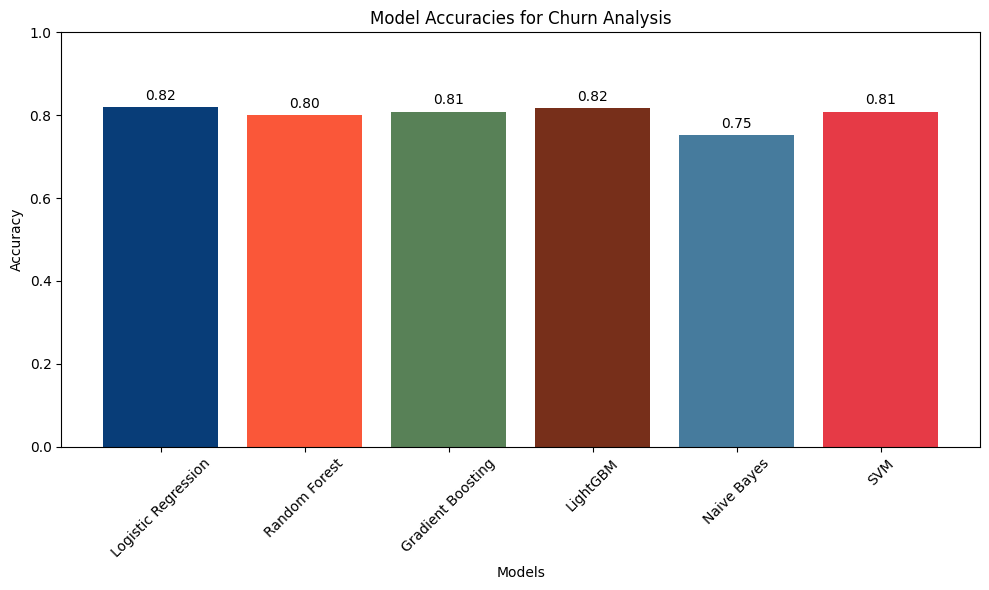

In [ ]:
# Plotting the accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color=['#083D78', '#FA5739', '#588157', '#772F1A', '#467B9D', '#E63A46'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies for Churn Analysis')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
for i in range(len(models)):
    plt.text(i, accuracy_values[i] + 0.01, f'{accuracy_values[i]:.2f}', ha='center', va='bottom')
plt.show()

#Optimization of models

##Applying SMOTE tehchnic

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res2, y_res2 = smote.fit_resample(X, y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res2, y_res2, test_size=0.2, random_state=42)

##Logistic Regression after SMOTE

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

model_logreg = LogisticRegression()

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4),  # C is the inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

random_search = RandomizedSearchCV(model_logreg, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train2, y_train2)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred2 = best_model.predict(X_test2)

print("Accuracy: ", accuracy_score(y_test2, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'C': 3.240453578716723, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}
Best cross-validation score:  0.799182560887686
Accuracy:  0.8088381330685204
Confusion Matrix:
 [[775 221]
 [164 854]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       996
           1       0.79      0.84      0.82      1018

    accuracy                           0.81      2014
   macro avg       0.81      0.81      0.81      2014
weighted avg       0.81      0.81      0.81      2014



##Naive Bayes after SMOTE technic

In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

param_dist = {
    'var_smoothing': loguniform(1e-9, 1e-2)
}

random_search = RandomizedSearchCV(estimator=nb, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

random_search.fit(X_train2, y_train2)

print("Best parameters found: ", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred3 = best_model.predict(X_test2)

print("Accuracy: ", accuracy_score(y_test2, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred3))
print("Classification Report:\n", classification_report(y_test2, y_pred3))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'var_smoothing': 0.004518560951024112}
Accuracy:  0.7800397219463754
Confusion Matrix:
 [[736 260]
 [183 835]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       996
           1       0.76      0.82      0.79      1018

    accuracy                           0.78      2014
   macro avg       0.78      0.78      0.78      2014
weighted avg       0.78      0.78      0.78      2014



##LGBM after SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [31, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20]
}


grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train2, y_train2)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred_final)
print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred_final))
print("Classification Report:\n", classification_report(y_test2, y_pred_final))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4015, number of negative: 4037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 8052, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498634 -> initscore=-0.005464
[LightGBM] [Info] Start training from score -0.005464
Best parameters found:  {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 50}
Best accuracy found:  0.8333326393467273
Accuracy:  0.836643495531281
Confusion Matrix:
 [[816 180]
 [149 869]]
Classification Report:
               precision    recall  f1-

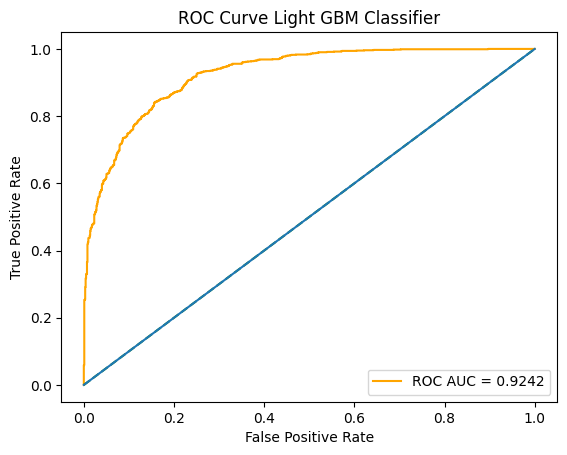

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_final_prob = best_model.predict_proba(X_test2)[:,1]

roc_auc = roc_auc_score(y_test2, y_pred_final_prob)
gini = (2*roc_auc_score(y_test2, y_pred_final_prob))-1

fpr, tpr, thresholds = roc_curve(y_test2, y_pred_final_prob)
plt.figure()

plt.plot(fpr, tpr, label='ROC AUC = %0.4f' % roc_auc, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light GBM Classifier')

plt.legend(loc='lower right')
plt.show()

##Random Forest after SMOTE technic

In [ ]:
from scipy.stats import randint

rf = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(100, 501),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)


best_params = random_search.best_params_
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train2, y_train2)

test_score_best = best_rf.score(X_test2, y_test2)
print("Test set score with best params: ", test_score_best)

y_pred_rf2 = best_rf.predict(X_test2)
print("Classification Report:\n", classification_report(y_test2, y_pred_rf2))
print("Accuracy: ", accuracy_score(y_test2, y_pred_rf2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred_rf2))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

##SVM after SMOTE technic

In [ ]:
from scipy.stats import expon, reciprocal
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_distributions_svm = {
    'C': reciprocal(0.001, 100),
    'gamma': expon(scale=0.1),
    'kernel': ['linear', 'rbf']
}

# Initialize the model
svm = SVC(probability=True)

# Initialize RandomizedSearchCV
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_distributions_svm,
                                       n_iter=100, scoring='roc_auc', cv=5,
                                       verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search_svm.fit(X_train2, y_train2)

# Best parameters and score
print(f"Best parameters found: {random_search_svm.best_params_}")
print(f"Best ROC AUC score: {random_search_svm.best_score_}")

# Evaluate on test data
best_svm_model = random_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict_proba(X_test2)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print(f"Test ROC AUC score: {roc_auc_svm}")

y_pred_svm2 = best_svm_model.predict(X_test2)
print("Classification Report:\n", classification_report(y_test2, y_pred_rf2))
print("Accuracy: ", accuracy_score(y_test2, y_pred_rf2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred_rf2))

## Gradient Boosting after SMOTE technic

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid
param_distributions_gb = {
    'n_estimators': randint(50, 500),             # Number of boosting stages
    'learning_rate': uniform(0.01, 0.3),          # Learning rate from 0.01 to 0.31
    'max_depth': randint(1, 10),                  # Maximum depth of individual trees
    'min_samples_split': randint(2, 20),          # Minimum number of samples to split an internal node
    'min_samples_leaf': randint(1, 20),           # Minimum number of samples to be a leaf node
    'subsample': uniform(0.5, 0.5),               # Fraction of samples used for fitting individual trees
    'max_features': ['auto', 'sqrt', 'log2', None] # Number of features to consider when looking for the best split
}

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    gb,
    param_distributions=param_distributions_gb,
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_gb.fit(X_train2, y_train2)

# Best parameters and score
print(f"Best parameters found: {random_search_gb.best_params_}")
print(f"Best ROC AUC score: {random_search_gb.best_score_}")

# Evaluate on test data
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict_proba(X_test2)[:, 1]
roc_auc_gb = roc_auc_score(y_test2, y_pred_gb)
print(f"Test ROC AUC score: {roc_auc_gb}")

y_pred_gb2 = best_gb_model.predict(X_test2)
print("Classification Report:\n", classification_report(y_test2, y_pred_gb2))
print("Accuracy: ", accuracy_score(y_test2, y_pred_gb2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred_gb2))